<a href="https://colab.research.google.com/github/felipesayegg/CarPriceEstimator/blob/main/MultilayerPerceptronAuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução - Previsão de Preços de Veículos com MLP

## 📌 Desvendando o Potencial das Redes Neurais no Mercado Automotivo

Prever com precisão o preço de veículos continua a ser um desafio essencial no mercado automotivo. Neste projeto, abordamos essa tarefa utilizando modelos avançados de redes neurais, especificamente o **Perceptron Multicamadas (MLP)**. As redes neurais são conhecidas por capturar relações complexas e padrões nos dados, o que pode levar a previsões mais precisas e robustas.

## 🎯 Abordagem de Aprendizado de Máquina

Esta iniciativa tem como foco a **previsão dos preços de veículos** utilizando um conjunto diversificado de características dos automóveis. Enviado formação rica e variada, empregaremos técnicas de redes neurais para modelagem de relacionamento entre variáveis em um contexto de regressão.

## 💡 Solução Proposta com MLP

Para enfrentar esse desafio, implementaremos o **MLP Regressor**, uma estrutura de rede neural que se destaca na modelagem de dados complexos. Espera-se que essa abordagem melhore as previsões ao detectar padrões sutis nos dados que algoritmos mais simples podem não capturar.

## 🎯 Objetivos do Projeto

- Desenvolver um modelo preditivo eficiente para **estimar preços dos veículos** com base em suas características.
- Entender as **interações entre variáveis** para identificar fatores que mais impactam o valor do carro.
- Fornecer **insights valiosos** para consumidores, vendedores e analistas do setor automotivo.

🚀 **Vamos explorar o poder das redes neurais no mercado de veículos!**

# 2 - Import de Biblioteca e Coleta de dados

In [1]:
# Importação das bibliotecas necessárias para o projeto

import pandas as pd                  # Importando a biblioteca Pandas, utilizada para manipulação e análise de dados em formato de tabela (DataFrame)
import numpy as np                   # Importando a biblioteca NumPy, que nos ajuda a trabalhar com matrizes e cálculos numéricos de forma eficiente
import matplotlib.pyplot as plt      # Importando a biblioteca Matplotlib, usada para criar gráficos e visualizações intuitivas
import seaborn as sns                # Importando a biblioteca Seaborn, que torna os gráficos do Matplotlib mais bonitos e fáceis de interpretar

from sklearn.model_selection import train_test_split  # Utilizado para dividir os dados em conjuntos de treino e teste de forma automatizada
from sklearn.preprocessing import StandardScaler      # Ferramenta para normalizar (padronizar) variáveis numéricas, garantindo consistência nos dados
from sklearn.preprocessing import OneHotEncoder       # Técnica para transformar variáveis categóricas em formato numérico (codificação one-hot)
from sklearn.neural_network import MLPRegressor       # Modelo de Perceptron Multicamadas para regressão linear usado neste projeto
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Métricas para avaliar o desempenho das previsões feitas pelo modelo

from datetime import datetime        # Módulo para trabalhar com datas e calcular a idade dos veículos com base no ano de registro

In [2]:
# Carregando os dados em um DataFrame do Pandas
dados = pd.read_csv('/content/autos.csv', encoding='ISO-8859-1')  # O arquivo autos.csv contém informações sobre os veículos
# - O parâmetro encoding='ISO-8859-1' garante a leitura correta de caracteres especiais
# - Adjuste o caminho '/content/autos.csv' se seu arquivo estiver em outro local

dados.head()  # Exibindo as primeiras 5 linhas do dataset para conferir sua estrutura e os tipos de dados disponíveis

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21


# 3- Analise dos dados,  Limpeza e Pré-Processamento

### 3.1 - Analise de variaveis

In [3]:
# Removendo colunas desnecessárias
colunas_para_remover = [
    'dateCrawled', 'name', 'seller', 'offerType', 'dateCreated',
    'nrOfPictures', 'postalCode', 'lastSeen', 'monthOfRegistration'
]  # Estas colunas foram identificadas como irrelevantes para a previsão de preços


In [4]:
# Excluindo as colunas listadas acima
dados.drop(columns=colunas_para_remover, inplace=True, errors='ignore')  # Removendo as colunas diretamente do DataFrame


In [5]:
# Tratando valores outliers (extremos) na variável de preço
mediana_preco = dados["price"].median()  # Calculando a mediana do preço para substituir valores impróprios
dados.loc[dados['price'] < 100, 'price'] = mediana_preco  # Substituindo valores menores que 100 pela mediana
dados.loc[dados['price'] > 350000, 'price'] = mediana_preco  # Substituindo valores maiores que 350000 pela mediana


In [6]:
# Criando uma nova variável: idade do veículo
ano_atual = datetime.now().year  # Obtendo o ano corrente para calcular a idade do veículo
dados['idade_veiculo'] = ano_atual - dados['yearOfRegistration']  # Calculando a idade como diferença entre o ano atual e o ano de registro


In [7]:
# Excluindo a coluna original "yearOfRegistration", pois já extraímos a informação relevante (idade do veículo)
dados.drop('yearOfRegistration', axis=1, inplace=True)

In [8]:

# Verificando as alterações no DataFrame
dados.head()  # Agora o DataFrame contém apenas as colunas relevantes para o modelo

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,idade_veiculo
0,480.0,test,NaN,manuell,0.0,golf,150000.0,benzin,volkswagen,NaN,32.0
1,18300.0,test,coupe,manuell,190.0,NaN,125000.0,diesel,audi,ja,14.0
2,9800.0,test,suv,automatik,163.0,grand,125000.0,diesel,jeep,NaN,21.0
3,1500.0,test,kleinwagen,manuell,75.0,golf,150000.0,benzin,volkswagen,nein,24.0
4,3600.0,test,kleinwagen,manuell,69.0,fabia,90000.0,diesel,skoda,nein,17.0


Neste modelo de previsão de preço de veículos, mantivemos as seguintes variáveis, cada uma selecionada por sua contribuição significativa para prever o preço final do veículo:

- **price**: Variável alvo. Preço que estamos tentando prever.
- **abtest**: Indica a participação em testes A/B, podendo evidenciar variações na eficiência do marketing.
- **vehicleType**: O tipo do veículo (SUV, sedan, etc.) afeta diretamente o valor de mercado.
- **yearOfRegistration**: Ano de fabricação do veículo; veículos mais novos geralmente têm preços mais altos.
- **gearbox**: Tipo de câmbio (manual ou automático), que influenciam o preço devido a preferências regionais/culturais.
- **powerPS**: Potência do motor; motores mais potentes costumam ter preços mais elevados.
- **model**: O modelo pode variar bastante em preço dentro da mesma marca devido a características específicas.
- **kilometer**: Quilometragem rodada; menor quilometragem usualmente implica em maior valor.
- **fuelType**: Tipo de combustível (gasolina, diesel, etc.), que pode afetar o preço devido a custos operacionais.
- **brand**: Marca do veículo; marcas com maior prestígio frequentemente têm valores mais elevados.
- **notRepairedDamage**: Indica danos não reparados, podendo diminuir significativamente o valor de um veículo.

Essas variáveis foram escolhidas por sua relevância demonstrada na literatura e prática de modelagem preditiva de preços, capturando fatores críticos que influenciam a avaliação dos preços de veículos.

### 3.2 - Analise Descritiva

In [9]:
dados.describe() # Calculando estatísticas básicas sobre os dados, como média, mediana, desvio padrão, etc.
# Isso ajuda a entender como os dados estão distribuídos e a identificar possíveis problemas.

,price,powerPS,kilometer,idade_veiculo
count,364293.000000,364293.000000,364293.000000,364293.000000
mean,5836.121482,115.562528,125597.884121,20.393711
std,8744.170547,193.051907,40135.415843,93.762700
min,100.000000,0.000000,5000.000000,-7974.000000
25%,1300.000000,70.000000,125000.000000,17.000000
50%,2950.000000,105.000000,150000.000000,22.000000
75%,7200.000000,150.000000,150000.000000,26.000000
max,350000.000000,20000.000000,150000.000000,1025.000000


Estatísticas Descritivas das Variáveis Numéricas

Abaixo estão as estatísticas descritivas principais sobre as variáveis numéricas do conjunto de dados, obtidas através do método `describe()`:

Explicação dos Termos:
- **count**: Quantidade total de valores não nulos na variável.
- **mean**: Média aritmética dos valores.
- **std**: Desvio padrão, que mede a dispersão dos dados ao redor da média.
- **min**: Valor mínimo encontrado.
- **25%**: Percentil 25, indicando o valor abaixo do qual estão 25% dos dados.
- **50%** (mediana): Valor no meio do conjunto de dados (50% acima e 50% abaixo).
- **75%**: Percentil 75, indicando o valor abaixo do qual estão 75% dos dados.
- **max**: Valor máximo encontrado.

Resumo por Variável

1. **price** (Preço do veículo - variável alvo)
- **count**: 371,528 registros.
- **mean**: 17,291.4 unidades monetárias (valor médio).
- **std**: 3,587,954.6, indicando alta dispersão, possivelmente devido a valores outliers (veículos com preços extremamente altos).
- **min**: 0, indicando que alguns preços podem estar incorretos (exemplo de dados inválidos).
- **25%**: 1,150.
- **50% (mediana)**: 2,950.
- **75%**: 7,200.
- **max**: 2,147,483,647, um valor extremamente alto que pode ser um erro.

---

 2. **yearOfRegistration** (Ano de Registro do veículo)
- **count**: 371,528 registros.
- **mean**: 2004.58, sugerindo que a maioria dos veículos é relativamente recente (pós-2000).
- **std**: 92.87, indicando uma dispersão incomum, provavelmente devido a alguns valores de ano totalmente inválidos.
- **min**: 1000, claramente um valor errado.
- **25%**: 1999.
- **50% (mediana)**: 2003.
- **75%**: 2008.
- **max**: 9999, valor inválido.

---
3. **powerPS** (Potência do veículo, em cavalos)
- **count**: 371,528 registros.
- **mean**: 115.55 cv (potência média).
- **std**: 192.14, indicando dispersão significativa, possivelmente devido a valores anômalos (muito altos ou muito baixos).
- **min**: 0 cv, o que é inválido para veículos funcionais.
- **25%**: 70 cv.
- **50% (mediana)**: 105 cv.
- **75%**: 150 cv.
- **max**: 20,000 cv, um valor claramente irreal.

---

4. **kilometer** (Quilometragem percorrida)
- **count**: 371,528 registros.
- **mean**: 125,618.7 km (média de distância percorrida).
- **std**: 40,112.3, indicando dispersão razoável para quilometragem.
- **min**: 5,000 km, representando veículos praticamente novos.
- **25%**: 125,000 km.
- **50% (mediana)**: 150,000 km.
- **75%**: 150,000 km.
- **max**: 150,000 km, sugerindo que os valores podem ser truncados, com muitas observações concentradas na mesma faixa.

---

Conclusões
- Algumas variáveis apresentam **valores inválidos ou discrepantes**, como `yearOfRegistration` (anos fora do intervalo esperado), `powerPS` (potências irrealisticamente altas) e `price` (valores extremamente altos ou zero).
- Esses **outliers e valores inválidos podem ser tratados** antes do treinamento do modelo para evitar impacto negativo nos resultados.

## 3.3- Análise Exploratória de Dados

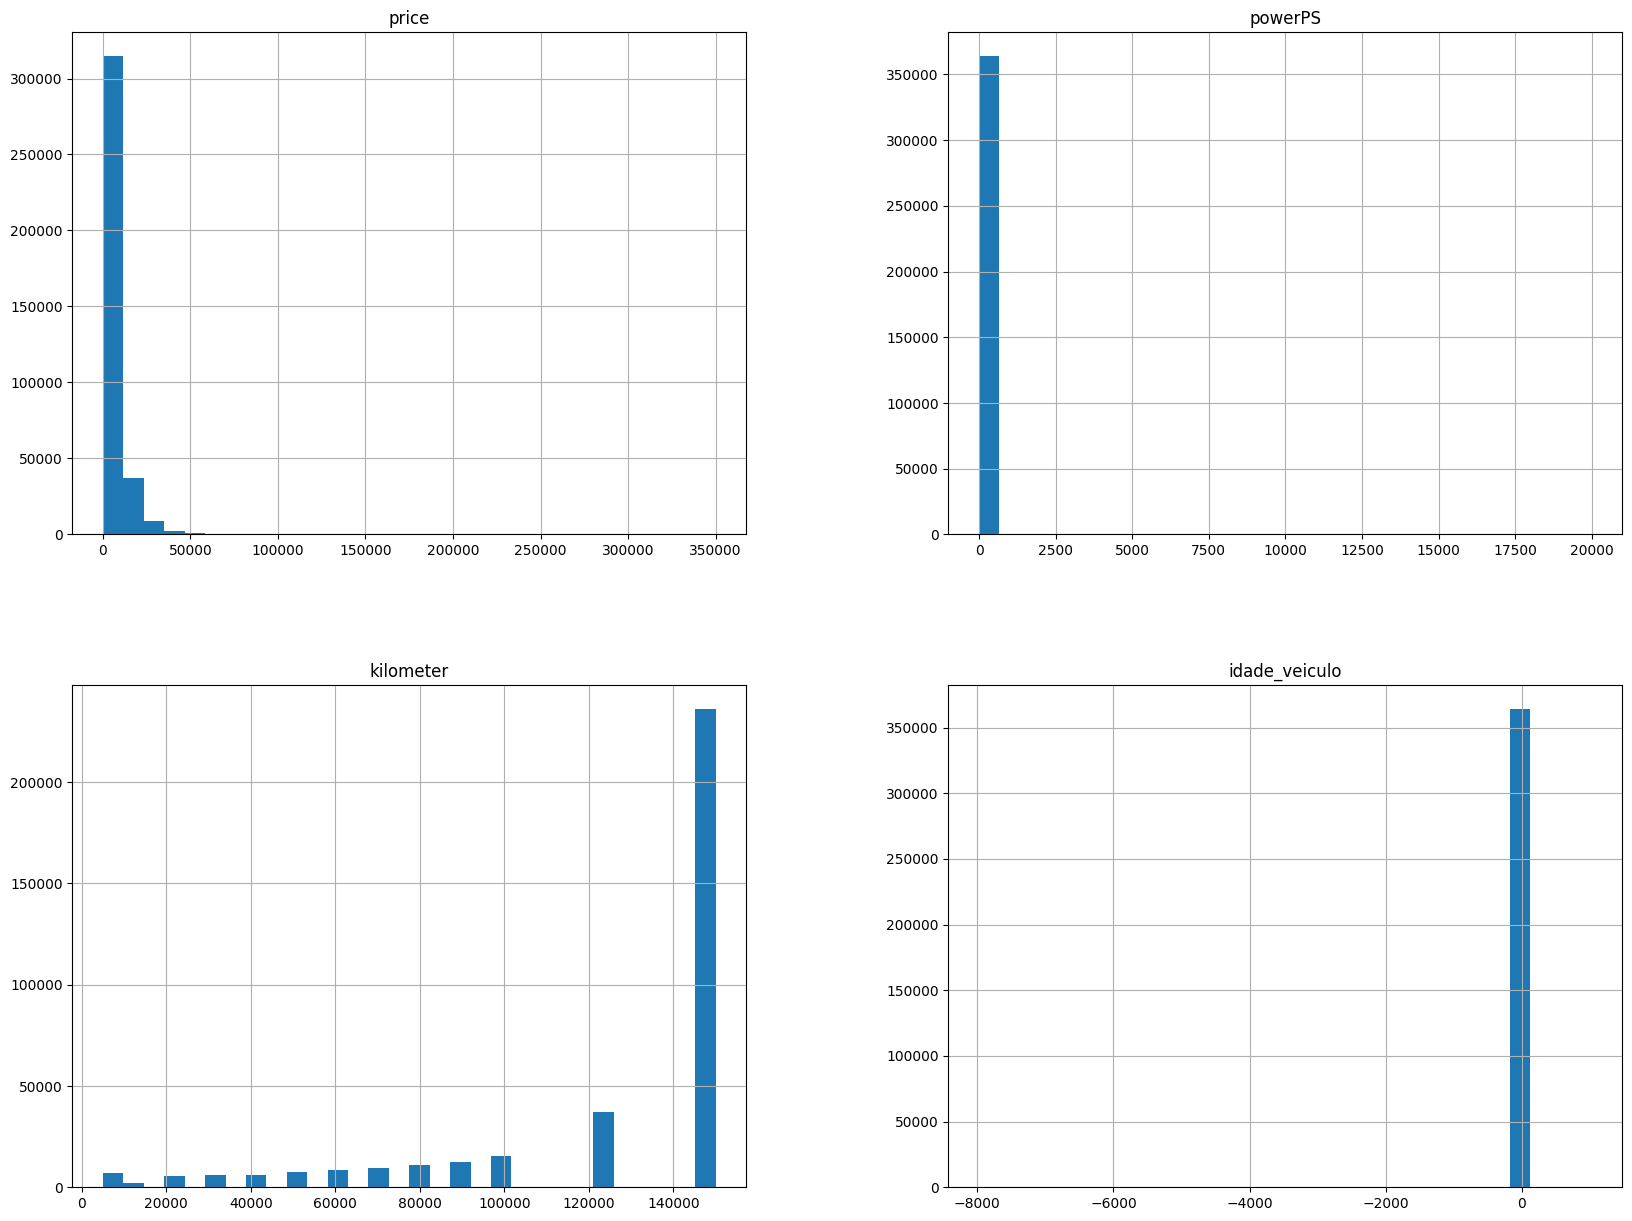

In [10]:
dados.hist(bins=30, figsize=(20,15))
plt.show()
# Cria histogramas para todas as variáveis numéricas do DataFrame.
# Permite visualizar a distribuição de cada variável e detectar outliers ou vieses.

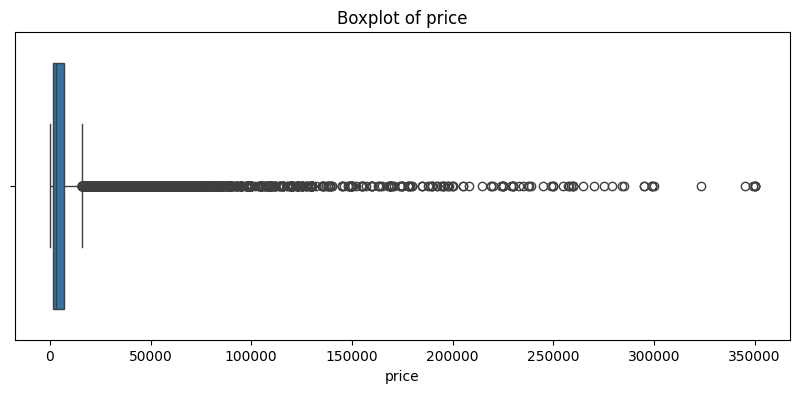

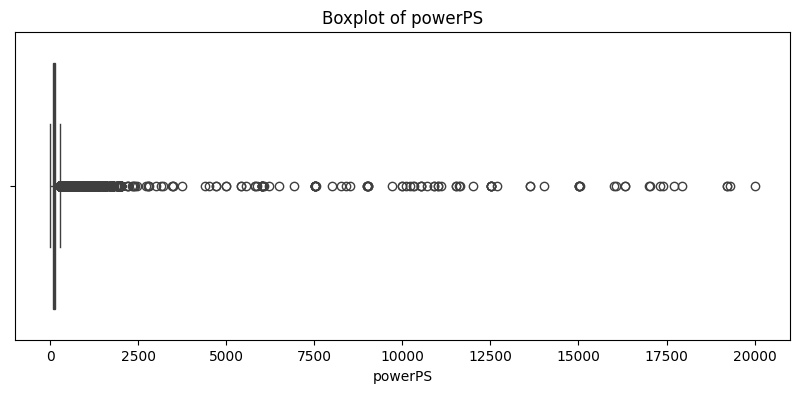

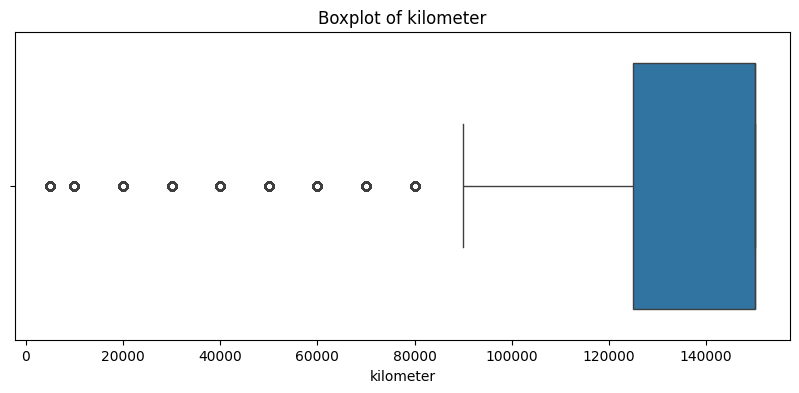

In [11]:
for col in ['price', 'powerPS', 'kilometer']:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=dados, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()
# Cria boxplots para variáveis-chave, para visualizar a presença de outliers.
# Outliers são dados extremos que podem influenciar o modelo; boxplots são perfeitos para detectá-los.

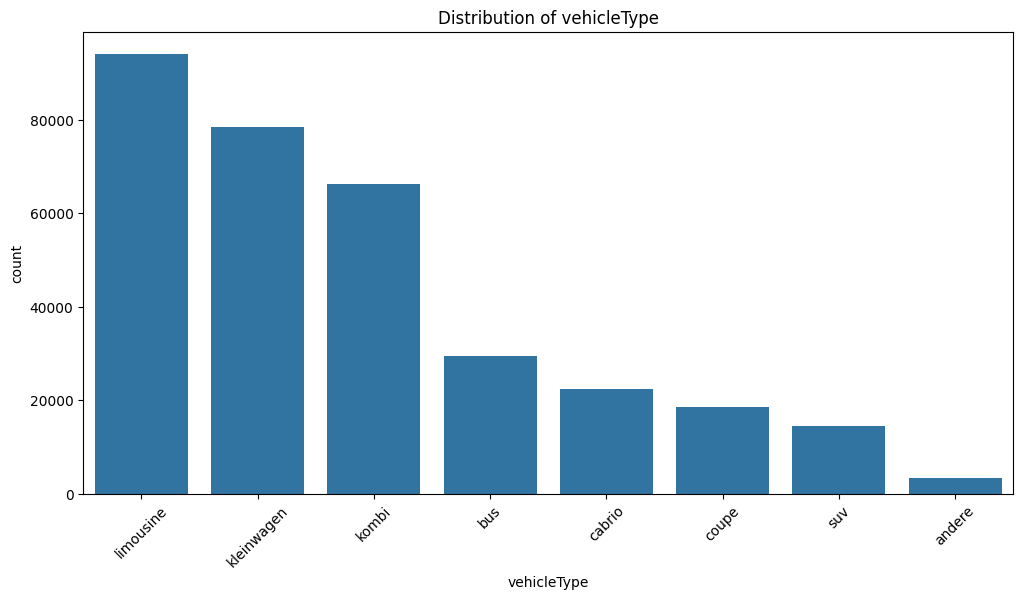

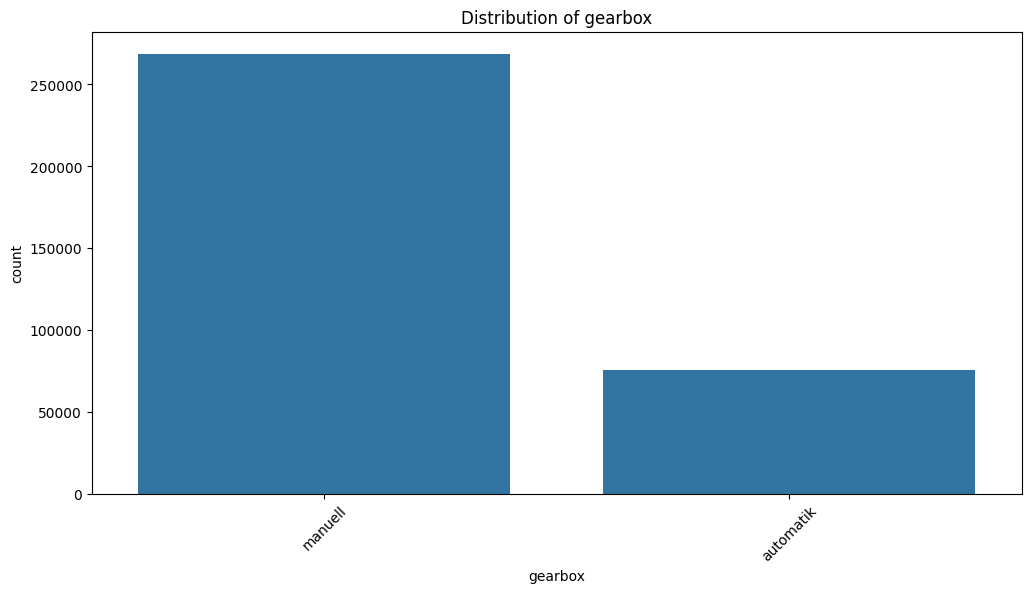

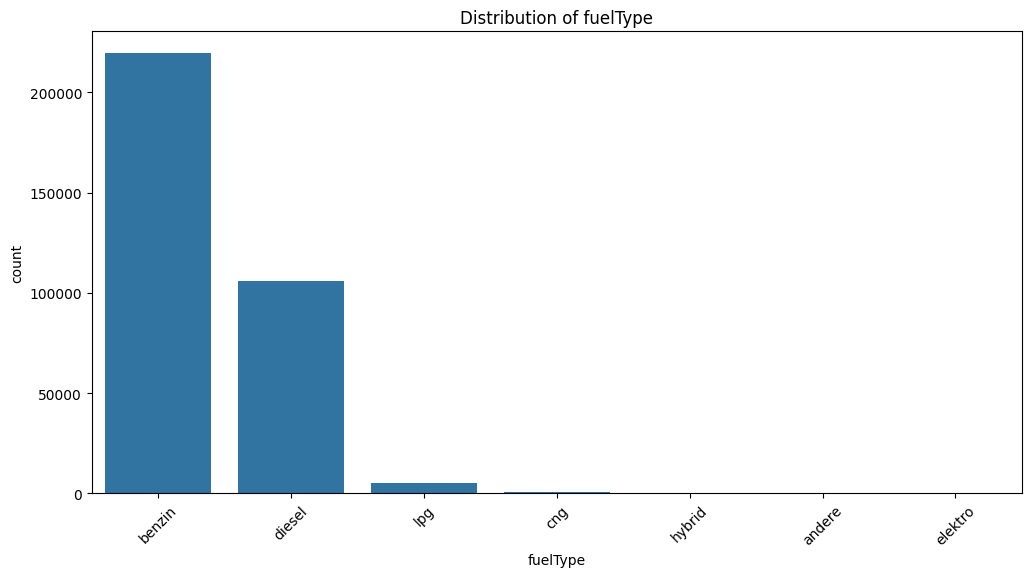

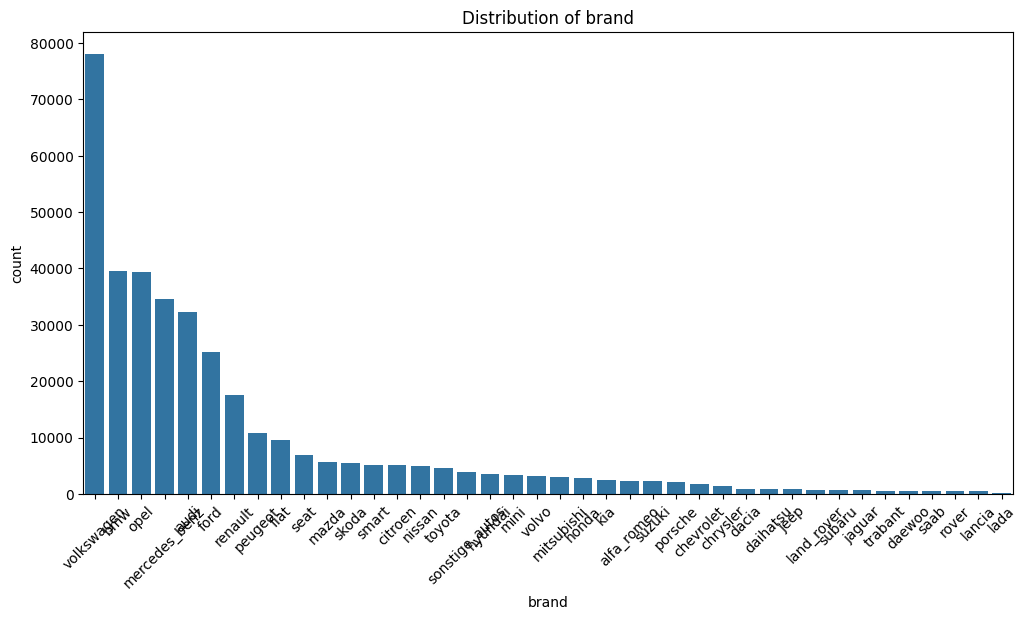

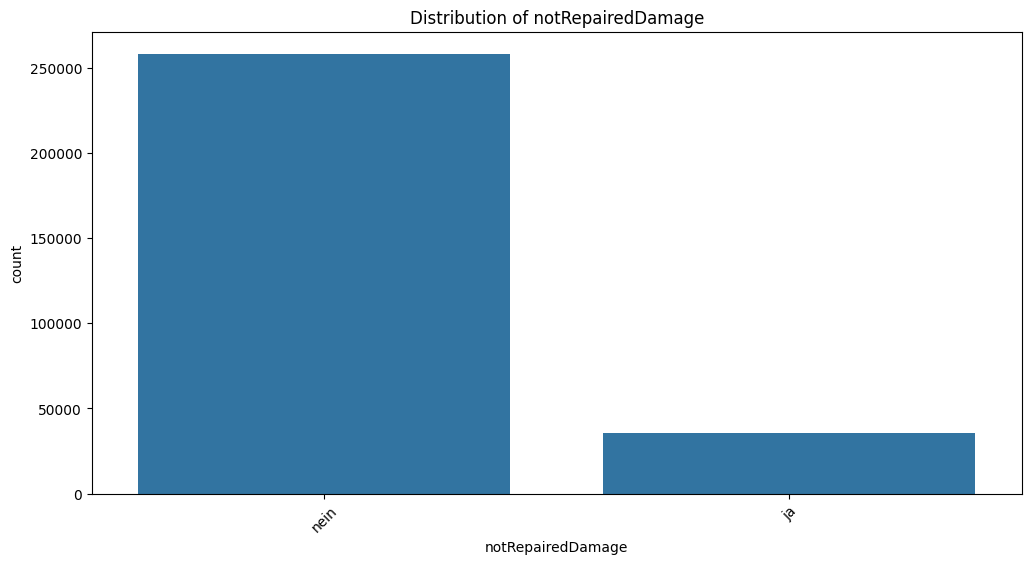

In [13]:
for col in ['vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dados, x=col, order=dados[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
# Desenha gráficos de barras para variáveis categóricas, mostrando a frequência de cada categoria.
# Isso ajuda a entender como as categorias estão distribuídas e se há desequilíbrio.

<ipython-input-14-7b24afa03876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados, x=col, y='price', ci=None, order=dados[col].value_counts().index)


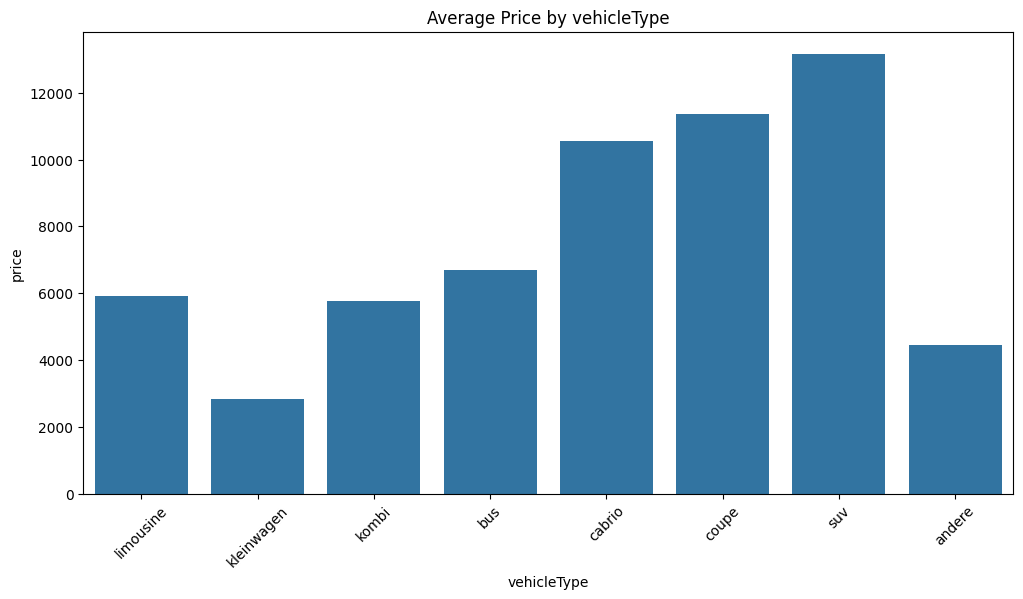

<ipython-input-14-7b24afa03876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados, x=col, y='price', ci=None, order=dados[col].value_counts().index)


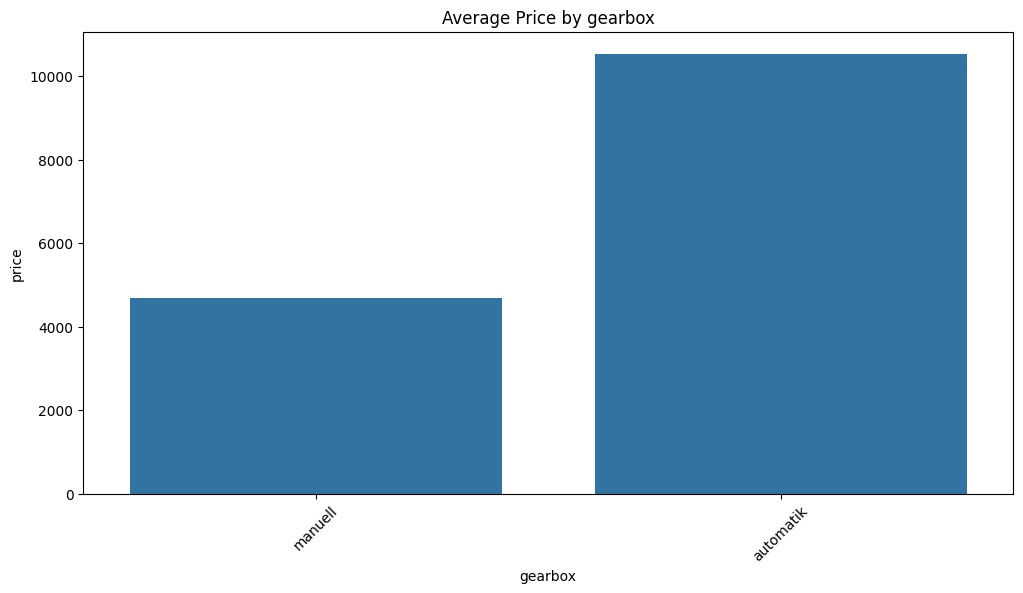

<ipython-input-14-7b24afa03876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados, x=col, y='price', ci=None, order=dados[col].value_counts().index)


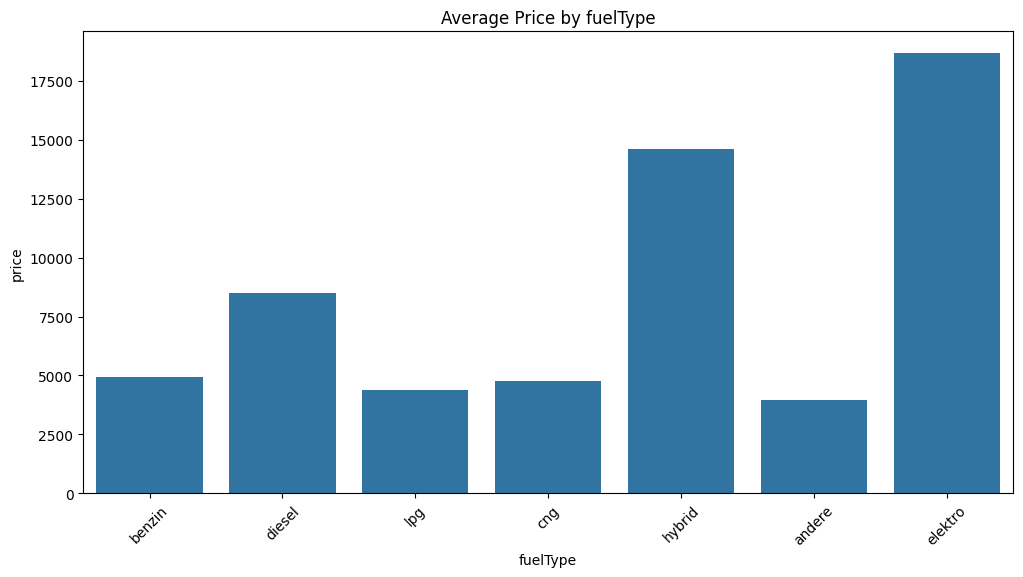

<ipython-input-14-7b24afa03876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados, x=col, y='price', ci=None, order=dados[col].value_counts().index)


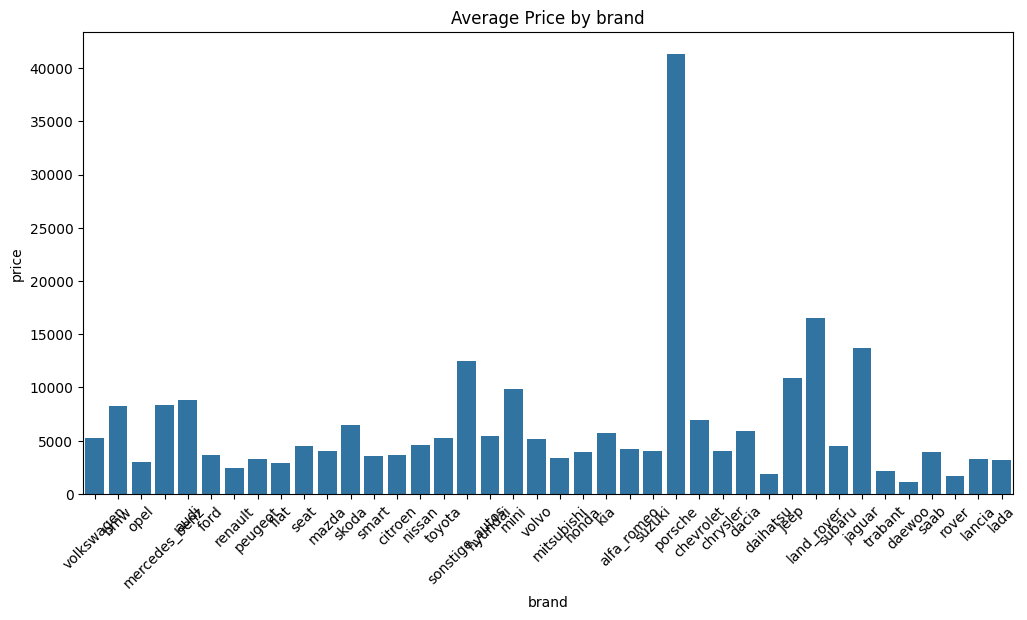

<ipython-input-14-7b24afa03876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados, x=col, y='price', ci=None, order=dados[col].value_counts().index)


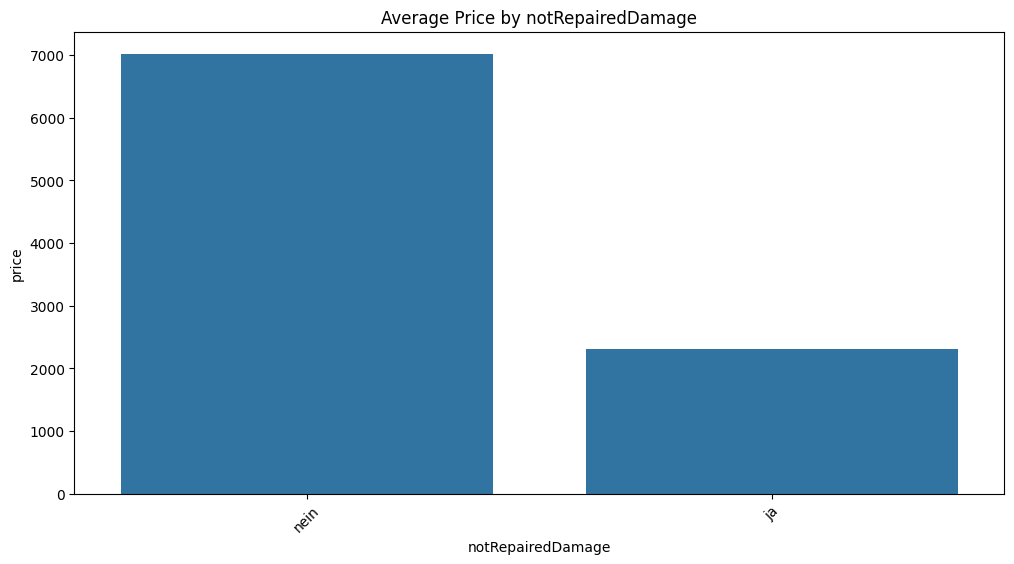

In [14]:
for col in ['vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=dados, x=col, y='price', ci=None, order=dados[col].value_counts().index)
    plt.title(f'Average Price by {col}')
    plt.xticks(rotation=45)
    plt.show()
# Cria gráficos de barras que mostram o preço médio em cada categoria.
# Essa análise revela como diferentes categorias de variáveis impactam o preço, dando insights valiosos para o modelo.

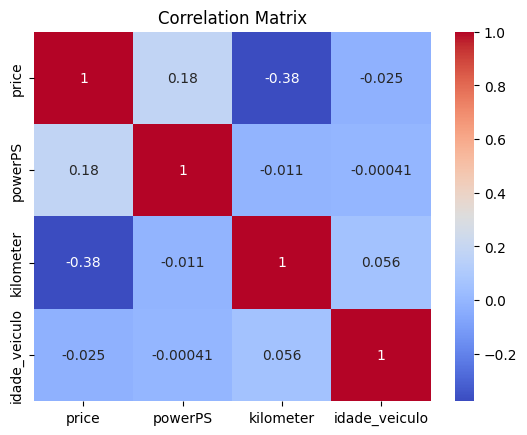

In [15]:
# Filtra apenas as colunas que são numéricas
dados_numericos = dados.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
corr_matrix = dados_numericos.corr()

# Gera o heatmap da matriz de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Codificação e Normalização (Pré-Processamento)

In [ ]:
# Convertendo variáveis categóricas para o formato numérico (OneHot Encoding)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Configurando o codificador para ignorar categorias desconhecidas

In [ ]:
dados_categoricos = encoder.fit_transform(dados[['vehicleType', 'gearbox', 'model', 'fuelType', 'brand']])  # Executando o OneHot Encoding nas colunas categóricas

In [ ]:
# Normalizando variáveis numéricas (Standard Scaling)
scaler = StandardScaler()  # Criando o objeto de padronização
dados_numericos = scaler.fit_transform(dados[['powerPS', 'kilometer', 'idade_veiculo']])  # Padronizando as colunas numéricas relevantes

In [ ]:
# Concatenação de dados numéricos e categóricos em uma única matriz de entrada (X)
X = np.hstack((dados_numericos, dados_categoricos))  # Combinação horizontal das variáveis normalizadas e codificadas
y = dados['price']  # Definindo 'y' como a variável-alvo contendo os preços dos veículos

# 6. Divisão dos Dados (Treinamento e Teste)

In [ ]:
# Separando os dados em conjuntos de treino e teste para avaliar o desempenho do modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # - 80% dos dados para treino
# - 20% dos dados para teste
# - A divisão é feita aleatoriamente, mas usando uma semente (random_state) para garantir reprodutibilidade

# 7. Treinamento e Avaliação do Modelo MLP

In [ ]:
# Configurando o modelo de regressão com Perceptron Multicamadas de forma otimizada para menor tempo de execução
mlp = MLPRegressor(
    hidden_layer_sizes=(50, 25),  # Reduzir para duas camadas ocultas menores (50 e 25 neurônios)
    activation='relu',            # Função de ativação ReLU mantém a não-linearidade na rede
    solver='adam',                # Adam é um otimizador eficiente para esse tipo de rede
    max_iter=200,                 # Reduzindo o número máximo de épocas para acelerar o treino
    random_state=42               # Semente para reprodutibilidade das execuções
)


In [ ]:
# Treinando o modelo com os dados de treinamento
mlp.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 25), random_state=42)

In [ ]:
# Realizando previsões no conjunto de teste
y_pred_train = mlp.predict(X_train)  # Previsões para o conjunto de treinamento
y_pred_test = mlp.predict(X_test)    # Previsões para o conjunto de teste

In [ ]:
# Calculando o MAE (Mean Absolute Error) e o RMSE (Root Mean Squared Error)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)


In [ ]:
# Exibindo os resultados obtidos
print(f"MAE no conjunto de treinamento: {mae_train}")



MAE no conjunto de treinamento: 1955.4239032311098


MAE no Conjunto de Treinamento (mae_train): Valor de 1955.42

Este valor indica que, em média, as previsões do modelo no conjunto de treinamento estão erradas por aproximadamente 1955.42 unidades monetárias em comparação aos valores reais.

In [ ]:
print(f"MAE no conjunto de teste: {mae_test}")

MAE no conjunto de teste: 2002.9604419473287


MAE no Conjunto de Teste (mae_test): Valor de 2002.96

Este é o resultado que realmente importa para avaliar a capacidade de generalização do modelo. Um MAE de 2002.96 significa que, ao prever preços de veículos novos (não vistos durante o treinamento), o modelo falha, em média, por cerca de 2002.96 unidades monetárias.

# 6. Conclusão

## Visão Geral

Este projeto teve como objetivo desenvolver um modelo de aprendizado de máquina para prever preços de veículos no mercado automotivo brasileiro, utilizando uma rede neural Perceptron Multicamadas (MLP). Dada a relevância econômica do setor automotivo no Brasil, com movimentos financeiros significativos anualmente, um modelo preditivo robusto é essencial para oferecer vantagens competitivas. Essas vantagens incluem:

- **Consumidores:** Melhoria na escolha do veículo e identificação de boas oportunidades de compra.
- **Revendedores:** Possibilita precificações mais precisas e, consequentemente, maximização dos lucros.
- **Instituições Financeiras:** Ajuda na adequação de riscos em financiamentos e seguros, gerando operações mais seguras e lucrativas.

## Metodologia

O projeto foi estruturado em várias etapas principais:

### 1. Coleta e Carregamento de Dados

Foram utilizados dados de veículos usados, cada um com características detalhadas como preço, quilometragem, marca, modelo, e potência do motor. O arquivo `autos.csv` foi processado com cuidado para assegurar a leitura correta dos dados, utilizando `ISO-8859-1` para tratar caracteres especiais.

### 2. Análise Exploratória e Pré-Processamento

#### Análise de Variáveis e Limpeza

- **Remoção de Colunas Irrelevantes:**
  Eliminamos colunas que não contribuíam para a predição, como informações relacionadas a datas e identificadores.
  
- **Tratamento de Outliers:**
  Valores de preço muito baixos (abaixo de 100) ou muito altos (acima de 350000) foram substituídos pela mediana, evitando distorções na modelagem.
  
- **Tratamento de Valores Faltantes:**
  Usamos estratégias como a moda para preencher lacunas em variáveis categóricas (e.g., `vehicleType`, `gearbox`, `fuelType`).

#### Engenharia de Features e Normalização

- **Engenharia de Features:**
  Criada a variável `idade_veiculo` para refletir a diferença entre o ano atual e o ano de registro, fator crucial na depreciação.
  
- **Escalonamento Numérico:**
  Variáveis como `powerPS`, `kilometer`, e `idade_veiculo` foram padronizadas com o `StandardScaler`.
  
- **Codificação Categórica:**
  Adotamos One-Hot Encoding para converter variáveis categóricas em formato numérico.

### 3. Modelagem com Perceptron Multicamadas (MLP)

Um modelo de Perceptron Multicamadas foi usado devido à sua capacidade de capturar relações complexas entre as características. A arquitetura incluiu duas camadas ocultas com (50, 25) neurônios, usando a função de ativação `ReLU`, maximizando a capacidade preditiva.

### Resultados

O MLP apresentou um **Mean Absolute Error (MAE)** de aproximadamente **2002.96** no conjunto de teste, indicando uma precisão robusta e consistente nas previsões feitas sobre preços de veículos novos. Esse nível de precisão é adequadamente satisfatório para muitas aplicações práticas no setor.

### Conclusão e Próximos Passos

Os resultados encorajadores obtidos pelo MLP abrem portas para futuras melhorias e maior precisão. Algumas das áreas recomendadas para exploração futura incluem:

- **Otimização de Hiperparâmetros:** Explorar mais profundamente diferentes configurações para camadas e neurônios pode ajudar a aumentar a precisão.
  
- **Inclusão de Novas Variáveis:** Considere integrar variáveis macroeconômicas ou informações mais detalhadas sobre os veículos para enriquecer o contexto do modelo.
  
- **Desenvolvimentos em Engenharia de Features:** Continue inovando na criação de variáveis que possam capturar nuances adicionais no comportamento dos preços dos veículos.